In [1]:
import pandas as pd
import pandas as pd
from tensorflow.keras.optimizers import Adam

import tensorflow as tf

In [2]:
dataset = tf.keras.utils.get_file("train.csv", "https://storage.googleapis.com/tf-datasets/titanic/train.csv")

# Read the dataset into a Pandas DataFrame
TITANIC = pd.read_csv(dataset)

In [3]:
import sys
sys.path.append('..')
from xDL.models.FTTransformer import FTTransformer

In [4]:
model = FTTransformer(
    data=TITANIC, 
    y="survived",
    output_activation="linear",
    binning_task="classification",
    num_classes=1,
    n_bins_num=25
    )

--- Preprocessing ---


10it [00:04,  2.31it/s]


In [5]:
model.training_dataset

<_PrefetchDataset element_spec=({'sex': TensorSpec(shape=(None, 1), dtype=tf.int64, name=None), 'age': TensorSpec(shape=(None, 25), dtype=tf.float32, name=None), 'n_siblings_spouses': TensorSpec(shape=(None, 1), dtype=tf.int64, name=None), 'parch': TensorSpec(shape=(None, 1), dtype=tf.int64, name=None), 'fare': TensorSpec(shape=(None, 25), dtype=tf.float32, name=None), 'class': TensorSpec(shape=(None, 1), dtype=tf.int64, name=None), 'deck': TensorSpec(shape=(None, 1), dtype=tf.int64, name=None), 'embark_town': TensorSpec(shape=(None, 1), dtype=tf.int64, name=None), 'alone': TensorSpec(shape=(None, 1), dtype=tf.int64, name=None)}, TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [6]:
model.compile(
    optimizer = Adam(learning_rate=0.001),
    loss = {"output": "binary_crossentropy", "importances": None, "att_weights": None},
    metrics= {"output": "binary_crossentropy", "importances": None, "att_weights": None},
        )

# Train the model
model.fit(model.training_dataset, epochs=100, validation_data=model.validation_dataset)



Epoch 1/100


1/1 [==============================] - 20s 20s/step - loss: 5.6086 - output_loss: 5.6086 - output_binary_crossentropy: 5.6086 - val_loss: 1.3749 - val_output_loss: 1.3749 - val_output_binary_crossentropy: 1.3749
Epoch 2/100
1/1 [==============================] - 0s 317ms/step - loss: 1.4058 - output_loss: 1.4058 - output_binary_crossentropy: 1.4058 - val_loss: 1.1209 - val_output_loss: 1.1209 - val_output_binary_crossentropy: 1.1209
Epoch 3/100
1/1 [==============================] - 0s 309ms/step - loss: 1.1449 - output_loss: 1.1449 - output_binary_crossentropy: 1.1449 - val_loss: 1.0917 - val_output_loss: 1.0917 - val_output_binary_crossentropy: 1.0917
Epoch 4/100
1/1 [==============================] - 0s 328ms/step - loss: 0.9887 - output_loss: 0.9887 - output_binary_crossentropy: 0.9887 - val_loss: 0.9687 - val_output_loss: 0.9687 - val_output_binary_crossentropy: 0.9687
Epoch 5/100
1/1 [==============================] - 0s 415ms/step - loss: 0.8882 - output_loss: 0.8882 - output_bi

In [7]:
model.summary()

Model: "ft_transformer"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 ft_transformer_encoder (FT  multiple                  146176    
 TransformerEncoder)                                             
                                                                 
 sequential_4 (Sequential)   (None, 72)                15192     
                                                                 
 dense_12 (Dense)            multiple                  73        
                                                                 
 layer_normalization_8 (Lay  multiple                  64        
 erNormalization)                                                
                                                                 
Total params: 161505 (630.88 KB)
Trainable params: 161505 (630.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


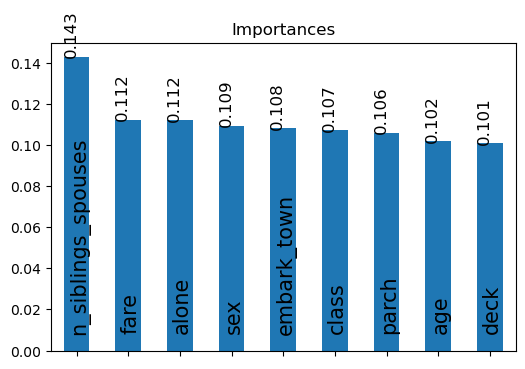

In [11]:
model.plot_importances()

--- Preprocessing ---


0it [00:00, ?it/s]

10it [00:03,  2.61it/s]


<Figure size 1200x400 with 0 Axes>

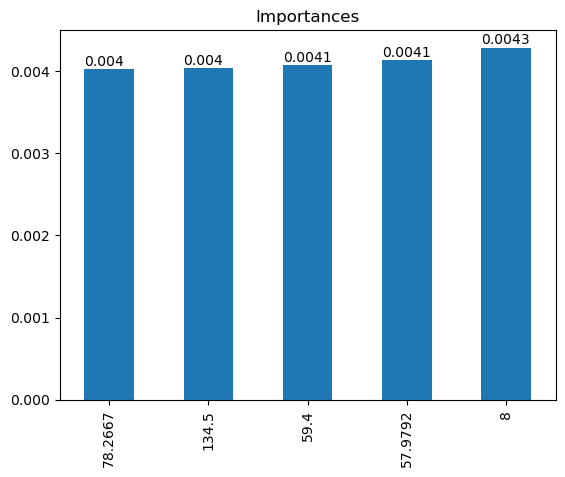

In [12]:
model.plot_categorical_importances()